(26051, 18743, 2)
(26051, 18743)


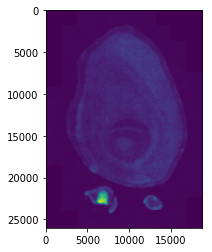

In [1]:
import bioformats as bf
import javabridge
javabridge.start_vm(class_path=bf.JARS)
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

czi_fp = '/media/alexn/Data_2/czi_convert_test/compression/DK17_18_slide003_2019_03_10.czi'
tiff_fp = '/media/alexn/Data_2/czi_convert_test/compression/pytest.tiff'

czi_file = bf.load_image(czi_fp)
img = bf.load_image(czi_fp, c=0, series=0)
print np.shape(czi_file)
print np.shape(img)
plt.imshow(img[32::,32::])

In [2]:
print 18743 * 26051 / (1024**2)
print np.size(img) / (1024**2)
print np.size(czi_file[:,:,0]) / (1024**2)
print np.size(czi_file[:,:,1]) / (1024**2)

465
465
465
465


In [3]:
bf.write_image( '/media/alexn/Data_2/czi_convert_test/compression/pytest_wi8.tiff', img, bf.PT_UINT8 )

bf.write_image( '/media/alexn/Data_2/czi_convert_test/compression/pytest_wi16.tiff', img, bf.PT_UINT16 )

In [5]:
import os
os.system("tiffcp -c %s %s %s" % 
          ("lzw", 
        '/media/alexn/Data_2/czi_convert_test/compression/output_gui.tiff', 
        '/media/alexn/Data_2/czi_convert_test/compression/tiffcp_1.tiff'))

0

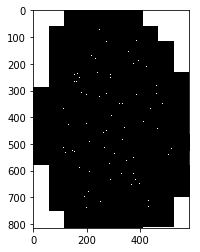

In [21]:
x = bf.load_image('/media/alexn/Data_2/czi_convert_test/compression/output_gui.tiff') == \
bf.load_image('/media/alexn/Data_2/czi_convert_test/compression/output_gui_exported_gimp.tiff')

plt.imshow(x[::32,::32], cmap='gray')
del x

In [37]:
import cv2 

img = cv2.imread('/media/alexn/Data_2/czi_convert_test/compression/output_gui.tiff')
cv2.imwrite('/media/alexn/Data_2/czi_convert_test/compression/output_gui_dechanneled.tiff', img[:,:,0] )

True

In [40]:
fp = '/media/alexn/Data_2/czi_convert_test/tiffs/x/'
tiff_fns = ! ls $fp

for tiff_fn in tiff_fns:
    img = cv2.imread( fp + tiff_fn )
    new_fn = fp + tiff_fn.replace('.czi #','').replace('W','')
    cv2.imwrite(new_fn, img[:,:,0] )

In [41]:
os.listdir(fp)

['DK17_18_slide003_2019_03_10.czi #01_C0_WCFP.tiff',
 'DK17_18_slide003_2019_03_10.czi #07_C0_WCFP.tiff',
 'DK17_18_slide003_2019_03_10.czi #12_C0_WCFP.tiff',
 'DK17_18_slide003_2019_03_10.czi #07_C1_WAF568.tiff',
 'DK17_18_slide003_2019_03_1007_C1_AF568.tiff',
 'DK17_18_slide003_2019_03_1007_C0_CFP.tiff',
 'DK17_18_slide003_2019_03_1012_C0_CFP.tiff',
 'DK17_18_slide003_2019_03_1001_C1_AF568.tiff',
 'DK17_18_slide003_2019_03_1012_C1_AF568.tiff',
 'DK17_18_slide003_2019_03_1001_C0_CFP.tiff',
 'DK17_18_slide003_2019_03_10.czi #12_C1_WAF568.tiff',
 'DK17_18_slide003_2019_03_10.czi #01_C1_WAF568.tiff']

In [ ]:
tiff_target_folder = '/media/alexn/Data_2/czi_convert_test/tiffs/f-test/'
for tiff_fn in os.listdir(tiff_target_folder):
        # Do nothing if expected patterns don't show up in the file
        if not '.czi' in tiff_fn or not '.tiff' in tiff_fn:
            continue
        
        # Remove unwanted symbols and whatnot
        new_fn = tiff_target_folder + tiff_fn.replace('.czi #','')
        # Read the image we just extracted
        img = cv2.imread( tiff_target_folder + tiff_fn )
        # Save the image in its proper format
        cv2.imwrite(new_fn, img[:,:,0] )
        
        del img
        os.remove( tiff_target_folder+tiff_fn )

In [1]:
import os, cv2
print cv2.__version__

3.2.0


In [ ]:
import numpy as np

tiff_target_folder = '/media/alexn/Data_2/czi_convert_test/tiffs/f-test/'
for tiff_fn in os.listdir(tiff_target_folder):
        # Do nothing if expected patterns don't show up in the file
        if not '.czi' in tiff_fn or not '.tiff' in tiff_fn:
            continue
        
        # Remove unwanted symbols and whatnot
        new_fn = tiff_target_folder + tiff_fn.replace('.czi #','')
        # Read the image we just extracted
        img = cv2.imread( tiff_target_folder + tiff_fn )
        print np.shape(img)
        # Save the image in its proper format
        #cv2.imwrite(new_fn, img[:,:,0] )
        
        #del img
        #os.remove( tiff_target_folder+tiff_fn )

(26051, 18743, 3)
(26081, 16840, 3)
(13126, 11288, 3)
(26093, 18683, 3)


In [8]:
# Remove unwanted symbols and whatnot
new_fn = tiff_target_folder + tiff_fn.replace('.czi #','')
# Read the image we just extracted
img = cv2.imread( tiff_target_folder + tiff_fn )
# Save the image in its proper format
#cv2.imwrite(new_fn, img[:,:,0] )

In [7]:
tiff_target_folder + tiff_fn 

'/media/alexn/Data_2/czi_convert_test/tiffs/f-test/DK17_18_slide004_2019_03_10.czi #01_S0_C1_AF568.tiff'

In [ ]:
from a_bioformats_utilities import *

clean_up_tiff_directory( '/media/alexn/Data_2/czi_convert_test/tiffs/f-test/' )

KeyboardInterrupt: 